### Sentiment Analysis on demonetization tweets

Sentiment analysis on tweets posted about demonetization using Vader sentiment analysis tool.<br>
This analysis also simulates a live Graph which shows positive and negative tweets over time.

In [16]:
import seaborn as sns
import nltk
import re
import numpy as np
import time
import csv
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline
%matplotlib notebook
%matplotlib notebook

In [4]:
# Reading tweets from a CSV file
# This can also be modified to read real time tweets using twitter api

df = pd.read_csv('demonetization-tweets.csv',header=None,encoding='ISO-8859-1')
df = df.iloc[::-1]
analyser = SentimentIntensityAnalyzer()

In [5]:
# Function to remove patterns in given text

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

In [6]:
# Pre Processing data

csvFile = open('demonetization-tweets-clean.csv', 'w')
csvWriter = csv.writer(csvFile)
for i in range(len(df)) :
    text = df.iloc[i, 2]
    # Removing twitter Return handles 
    text = remove_pattern(text, "RT @[\w]*:")
    # Removing twitter handles
    text = remove_pattern(text, "@[\w]*")
    # Removing URLs
    text = remove_pattern(text, "https?://[A-Za-z0-9./]*")
    csvWriter.writerow([df.iloc[i,6], text])
    
clean_df = pd.read_csv('demonetization-tweets-clean.csv',header=None)

In [7]:
# Function to get sentiment values for a group of tweets

def get_sentiment_values(clean_df):
    result = {'pos': 0 ,'neu': 0,'neg': 0,'count': 0}
    count=0
    for i in range(len(clean_df)) :
        sentiment = analyser.polarity_scores(clean_df.iloc[i, 1])
        if sentiment['compound']>=0.05:
            result['pos']= result['pos']+1
            a.append(1)
        elif sentiment['compound']<=-0.05:
            result['neg']= result['neg']+1
            a.append(-1)
        else:
            result['neu']=result['neu']+1
            a.append(0)
        count = count+1
    result['count'] = count
    return result

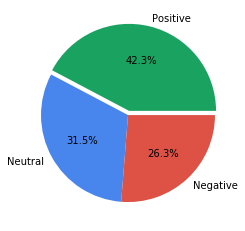

In [8]:
# This pie chart displays overall sentiment value for all the tweets

a=[]
sentimentValues = get_sentiment_values(clean_df)
clean_df['senty']=a
clean_df.columns=['time','text','senty']
count = sentimentValues['count']
pos = sentimentValues['pos']*100/count
neg = sentimentValues['neg']*100/count
neu = sentimentValues['neu']*100/count
slices = [pos, neu, neg]
reactions = ['Positive', 'Neutral', 'Negative']
colors = ['#1aa260','#4885ed','#de5246'] 
plt.pie(slices,labels=reactions, colors=colors,autopct='%1.1f%%',shadow=False,explode=(0.05,0,0))
plt.show()

In [9]:
# Function to extract hashtags from given text

def extract_hastag(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [10]:
# Retrieving hashtags from positive and negative tweets

positive_HT = extract_hastag(clean_df['text'][clean_df['senty'] == 1])
negative_HT = extract_hastag(clean_df['text'][clean_df['senty'] == -1])

positive_HT = sum(positive_HT,[])
negative_HT = sum(negative_HT,[])

In [11]:
positive_HT = [i for i in filter(lambda a: a!='Demonetization', positive_HT)]
positive_HT = [i for i in filter(lambda a: a!='demonetization', positive_HT)]
positive_HT = [i for i in filter(lambda a: a!='DeMonetization', positive_HT)]

negative_HT = [i for i in filter(lambda a: a!='Demonetization', negative_HT)]
negative_HT = [i for i in filter(lambda a: a!='demonetization', negative_HT)]
negative_HT = [i for i in filter(lambda a: a!='DeMonetization', negative_HT)]

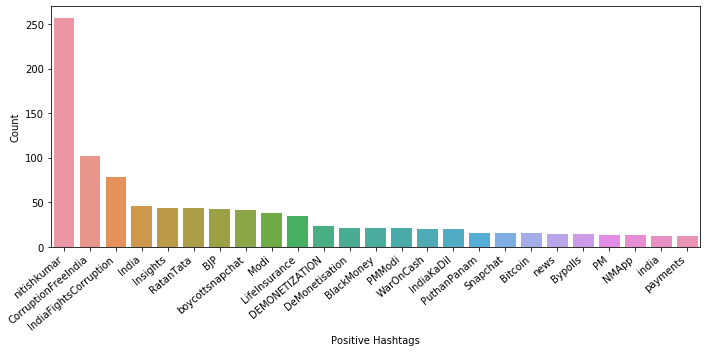

In [12]:
# Hashtags from postive tweets

a = nltk.FreqDist(positive_HT)
d = pd.DataFrame({'Hashtags': list(a.keys()), 'Count': list(a.values())})
d = d.nlargest(columns='Count',n=25)
plt.figure(figsize=(10,5))
ax = sns.barplot(data=d,x='Hashtags',y='Count')
ax.set(ylabel='Count')
ax.set(xlabel='Positive Hashtags')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

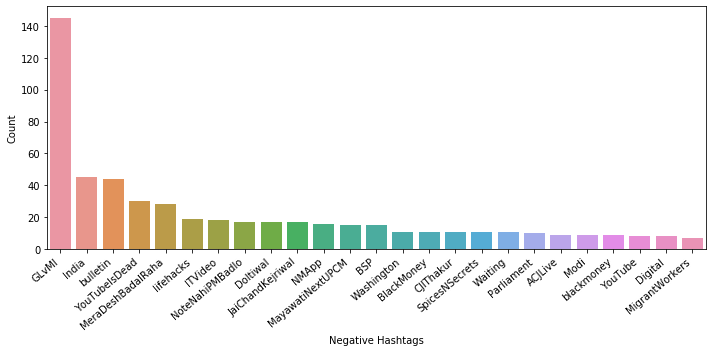

In [13]:
# Hashtags from negative tweets

b = nltk.FreqDist(negative_HT)
e = pd.DataFrame({'Hashtags': list(b.keys()), 'Count': list(b.values())})
e = e.nlargest(columns='Count',n=25)
plt.figure(figsize=(10,5))
ax = sns.barplot(data=e,x='Hashtags',y='Count')
ax.set(ylabel='Count')
ax.set(xlabel='Negative Hashtags')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [14]:
# Function which plots the bar graph which contains live count of positive and negative tweets over time 

def update(num):

    ax.clear()
    # Getting sentiment values for each tweet using vader sentiment analysis tool
    sentiment = analyser.polarity_scores(clean_df.iloc[num, 1])
    if sentiment['compound']>=0.05:
        slices[0] = slices[0]+1;
    elif sentiment['compound']<=-0.05:
        slices[2] = slices[2]+1;
    else:
        slices[1] = slices[1]+1;

    list = ax.bar(x_pos, slices, color='green')
    list[0].set_color('#1aa260')
    list[1].set_color('#4885ed')
    list[2].set_color('#de5246')
    for rect in list:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    plt.xlabel("Sentiment Value")
    plt.ylabel("Tweets")
    plt.xticks(x_pos, reactions)

    str_num = str(num)
    ax.set_title("Demonetization tweets sentiment stream\n" + clean_df.iloc[num,0])

<IPython.core.display.Javascript object>


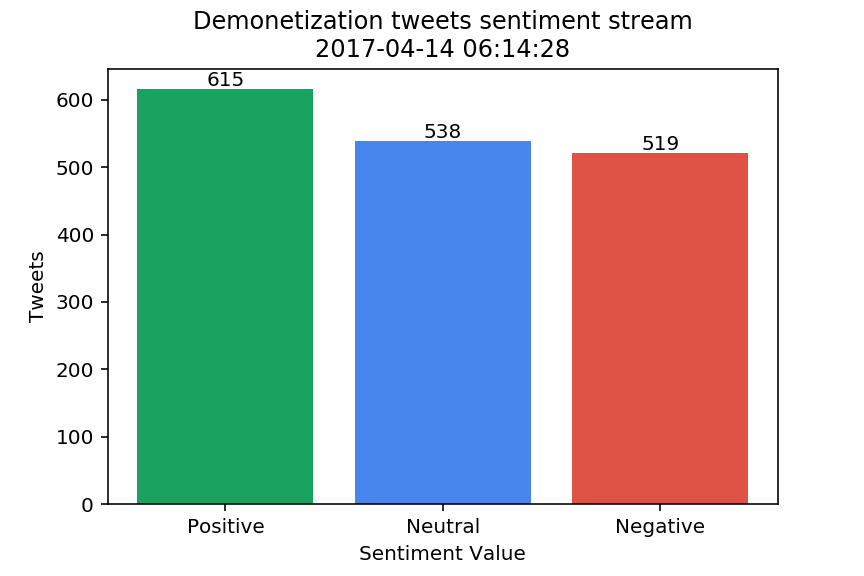

In [20]:
# Realtime bar graph animation

reactions = ['Positive', 'Neutral', 'Negative']
colors = ['#1aa260','#4885ed','#de5246']

fig, ax = plt.subplots()
x_pos = [i for i, _ in enumerate(reactions)]
slices = [0, 0, 0]
ani = FuncAnimation(fig, update, frames=range(len(clean_df)), repeat=False, interval=1)
plt.show()